# Classification Metrics

#### 🎯 Learning Goals

1. Understand the problem of assessing the performance of a classification model.
2. Understand how different metrics can be used to assess the performance of a classification model depending on the business problem.

In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

To make things simpler and focus on the classification metrics, let begin from where we finished in the last notebook..

In [2]:
# Load the loans data
loans = pd.read_csv("data/loan_defaults.csv")

In [3]:
# Drop the rows with missing values
loans.dropna(inplace=True)

# Transform categorical variables to dummies
str_cols = [col for col in loans.columns if loans[col].dtype == "O"]
loans = pd.get_dummies(loans, columns=str_cols, drop_first=True)

In [4]:
# Import sklearn functionalities
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Prepare features and target
X, y = loans.drop(columns=["loan_status"]), loans["loan_status"]

# Split the data into train and test sets so we can evaluate and compare our models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                            shuffle=True, random_state=72)

#### ➡️ ✏️ Task 1

1. Using the [`PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) class from scikit-learn, apply a Yeo-Johnson transformation to the features (be wary to fit on the train set only!).

2. Fit two models on the training set:
+ A `GaussianNB` model called `nbc`.
+ A `LogisticRegression` model called `lrc`.

*Hint*: The provided solution will combine the feature transformation and model fitting into a single pipeline. Feel free to read more on [Pipelines](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html) in the scikit-learn documentation and try to implement in this way directly as well.

In [6]:
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Feature transformation
nbc = Pipeline([
    ("transformer", PowerTransformer(method="yeo-johnson")),
    ("classifier", GaussianNB())
])
lrc = Pipeline([
    ("transformer", PowerTransformer(method="yeo-johnson")),
    ("classifier", LogisticRegression())
])
# Fit the models
nbc.fit(X_train, y_train)
lrc.fit(X_train, y_train)

Pipeline(steps=[('transformer', PowerTransformer()),
                ('classifier', LogisticRegression())])

In [7]:
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create models using a pipeline for feature transformation
nbc = Pipeline([
    ("scaler", PowerTransformer(method="yeo-johnson")), 
    ("model", GaussianNB())
])
lrc = Pipeline([
    ("scaler", PowerTransformer(method="yeo-johnson")), 
    ("model", LogisticRegression())
])

# Fit the models
nbc.fit(X_train, y_train)
lrc.fit(X_train, y_train)

# Store the most common class to compare to our models
most_common = int(y_train.value_counts().index[0])
most_common_train = np.ones_like(y_train) * most_common
most_common_test = np.ones_like(y_test) * most_common

In [8]:
# Compute predictions for different models once instead of multiple times later
y_hat_nbc_train = nbc.predict(X_train)
y_hat_nbc_test = nbc.predict(X_test)
y_hat_lrc_train = lrc.predict(X_train)
y_hat_lrc_test = lrc.predict(X_test)

In [9]:
# Compute accuracy (note how we can use both the .score method or the accuracy_score function)

print("Accuracy scores:")
print("-" * 35)
print(f"Naïve Bayes (train)        : {nbc.score(X_train, y_train):.3f}")
print(f"Naïve Bayes (test)         : {nbc.score(X_test, y_test):.3f}")
print(f"Logistic regression (train): {lrc.score(X_train, y_train):.3f}")
print(f"Logistic regression (test) : {lrc.score(X_test, y_test):.3f}")
print(f"Most common class (train)  : {accuracy_score(y_train, most_common_train):.3f}")
print(f"Most common class (test)   : {accuracy_score(y_test, most_common_test):.3f}")

Accuracy scores:
-----------------------------------
Naïve Bayes (train)        : 0.611
Naïve Bayes (test)         : 0.612
Logistic regression (train): 0.669
Logistic regression (test) : 0.668
Most common class (train)  : 0.617
Most common class (test)   : 0.612


#### ➡️ ✏️ Task 2

Looking at the results above for the most common class and the accuracy scores, discuss the performance of the models with your classmates. In particular, how do you feel about the Naïve Bayes model?

___

## Classification Metrics

### Accuracy

Accuracy is the proportion of correct predictions out of the total number of predictions made, i.e.,

$$\text{Accuracy} = \frac{TP + TN}{TP + FP + TN +FN},$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives, and $FN$ is the number of false negatives.

Consider the prediction using the most common class above. This prediction is useless if our business problem is to identify loans that are not repaid. However, it still receives an accuracy of 61%, close to the other models that use the full data. 

How can we figure out whether the models are actually useful for our problem?

### Precision

Precision, or the positive predictive value, measures the accuracy of the positive predictions made by the model, expressed as:

$$\text{Precision} = \frac{TP}{TP + FP}.$$

A high precision score indicates that a high proportion of positive identifications were actually correct, meaning the model has a low false positive rate. Precision is particularly important in scenarios where false positives carry a high cost, such as in spam detection or during a precision-targeted marketing campaign. A model with high precision ensures that resources are not wasted on incorrect targets, making it a critical metric in areas where the focus is on the quality of the positive detections rather than the quantity.

In [10]:
# scikit-learn also provides the precision metric
from sklearn.metrics import precision_score

In [11]:
# Compute precision

print("Precision scores:")
print("-" * 35)
print(f"Naïve Bayes (train)        : {precision_score(y_train, y_hat_nbc_train):.3f}")
print(f"Naïve Bayes (test)         : {precision_score(y_test, y_hat_nbc_test):.3f}")
print(f"Logistic regression (train): {precision_score(y_train, y_hat_lrc_train):.3f}")
print(f"Logistic regression (test) : {precision_score(y_test, y_hat_lrc_test):.3f}")

# The problem with precision for the most common class is that the denominator is zero,
# thus we set the precision to zero in this case (using the zero_division parameter)
print(f"Most common class (train)  : {precision_score(y_train, most_common_train, zero_division=0):.3f}")
print(f"Most common class (test)   : {precision_score(y_test, most_common_test, zero_division=0):.3f}")

Precision scores:
-----------------------------------
Naïve Bayes (train)        : 0.495
Naïve Bayes (test)         : 0.499
Logistic regression (train): 0.605
Logistic regression (test) : 0.609
Most common class (train)  : 0.000
Most common class (test)   : 0.000


### Recall

Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model, expressed as:

$$\text{Recall} = \frac{TP}{TP + FN}.$$

A high recall value indicates that the model is able to identify most of the positive cases correctly, with few false negatives. Therefore, when the consequence of missing a positive prediction (a false negative) is severe, such as in disease screening or criminal searches, prioritizing a model with high recall is essential. This ensures that actual positive cases are not overlooked, even if it means tolerating some false positives.

In [12]:
# scikit-learn also provides the recall metric
from sklearn.metrics import recall_score

In [13]:
# Compute recall

print("Recall scores:")
print("-" * 35)
print(f"Naïve Bayes (train)        : {recall_score(y_train, y_hat_nbc_train):.3f}")
print(f"Naïve Bayes (test)         : {recall_score(y_test, y_hat_nbc_test):.3f}")
print(f"Logistic regression (train): {recall_score(y_train, y_hat_lrc_train):.3f}")
print(f"Logistic regression (test) : {recall_score(y_test, y_hat_lrc_test):.3f}")

# The problem with recall for the most common class is that the denominator is zero,
# thus we set the recall to zero in this case (using the zero_division parameter)
print(f"Most common class (train)  : {recall_score(y_train, most_common_train, zero_division=0):.3f}")
print(f"Most common class (test)   : {recall_score(y_test, most_common_test, zero_division=0):.3f}")

Recall scores:
-----------------------------------
Naïve Bayes (train)        : 0.666
Naïve Bayes (test)         : 0.671
Logistic regression (train): 0.391
Logistic regression (test) : 0.399
Most common class (train)  : 0.000
Most common class (test)   : 0.000


### F1 Score

The F1 Score is the harmonic mean of precision and recall, providing a balance between the two. It is calculated as:

$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}.$$

The F1 Score is a useful metric when you need to balance precision and recall, typically in situations where both false positives and false negatives are important to minimize. This score can be particularly insightful when the class distribution is imbalanced, as it does not get as skewed by a large number of true negatives. It essentially combines the two aspects of the classifier's performance into one metric, offering a single score that can be used for comparison when evaluating models.

In [14]:
# scikit-learn also provides the f1 metric
from sklearn.metrics import f1_score

In [15]:
# Compute F1 score

print("F1 scores:")
print("-" * 35)
print(f"Naïve Bayes (train)        : {f1_score(y_train, y_hat_nbc_train):.3f}")
print(f"Naïve Bayes (test)         : {f1_score(y_test, y_hat_nbc_test):.3f}")
print(f"Logistic regression (train): {f1_score(y_train, y_hat_lrc_train):.3f}")
print(f"Logistic regression (test) : {f1_score(y_test, y_hat_lrc_test):.3f}")
print(f"Most common class (train)  : {f1_score(y_train, most_common_train, zero_division=0):.3f}")
print(f"Most common class (test)   : {f1_score(y_test, most_common_test, zero_division=0):.3f}")

F1 scores:
-----------------------------------
Naïve Bayes (train)        : 0.568
Naïve Bayes (test)         : 0.572
Logistic regression (train): 0.475
Logistic regression (test) : 0.482
Most common class (train)  : 0.000
Most common class (test)   : 0.000


___

## Receiver Operating Characteristic (ROC)

Remember that what we are doing with Naïve Bayes and Logistic Regression is actually estimating a conditional probability $P(Y=c|X=\mathbf{x})$. We then use this probability to make a prediction by choosing the class with the highest probability.

In the two classes case, this means that we take the class with probability higher than or equal to one-half, i.e.,

$$\hat{y} = \begin{cases} 1 & \text{if } P(Y=1|X=\mathbf{x}) \geq 0.5 \\ 0 & \text{otherwise}. \end{cases}$$

Now, suppose we wanted to just this $0.5$ and instead let it be a **threshold** parameter $\gamma \in [0, 1]$, i.e., we can write

$$\hat{y} = \begin{cases} 1 & \text{if } P(Y=1|X=\mathbf{x}) \geq \gamma \\ 0 & \text{otherwise}. \end{cases}$$

This means that we can vary the threshold and get different predictions. For example, if we set $\gamma = 0.9$, then we will predict $1$ only if the probability of $Y=1$ is at least $0.9$. This will result in **fewer positive predictions**, but the ones we make will be **more confident**. On the other hand, if we set $\gamma = 0.1$, then we will predict $1$ if the probability of $Y=1$ is at least $0.1$. This will result in **more positive predictions**, but the ones we make will be **less confident**.

It now becomes clear how we can use the threshold to control the trade-off between precision and recall. If we set $\gamma$ to a high value, then we will get a high precision but a low recall. On the other hand, if we set $\gamma$ to a low value, then we will get a high recall but a low precision.

___

## Receiver Operating Characteristic (ROC)

When using classifiers like Naïve Bayes and Logistic Regression, we estimate the conditional probability $P(Y=c|X=\mathbf{x})$. Based on this probability, we make a prediction, typically choosing the class with the highest estimated probability.

For binary classification, the decision rule often thresholds this probability at one-half, we have done this implicitly until now:

$$\hat{y} = \begin{cases} 1 & \text{if } P(Y=1|X=\mathbf{x}) \geq 0.5, \\ 0 & \text{otherwise}. \end{cases}$$

However, the threshold needs not be fixed at $0.5$. We can adjust it to a different **threshold** value $\gamma \in [0, 1]$. The prediction rule then becomes:

$$\hat{y} = \begin{cases} 1 & \text{if } P(Y=1|X=\mathbf{x}) \geq \gamma, \\ 0 & \text{otherwise}. \end{cases}$$

By varying the threshold $\gamma$, we obtain different sets of predictions:

- A high $\gamma$ (e.g., $\gamma = 0.9$) results in fewer positive predictions, increasing the confidence of these predictions (higher precision, lower recall).
- A low $\gamma$ (e.g., $\gamma = 0.1$) leads to more positive predictions, but with less confidence (lower precision, higher recall).

Adjusting $\gamma$ allows us to explicitly control the precision-recall trade-off. This is visually represented in the ROC curve, where the true positive rate (recall) is plotted against the false positive rate for various threshold settings.

The area under the ROC curve (AUC) provides a single scalar value summarizing the performance across all thresholds. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 suggests no discriminative power, equivalent to random guessing.

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
# For the ROC curve we need the probabilities, not the final predicted class!
p_nbc_test = nbc.predict_proba(X_test)[:, 1]
p_lrc_test = lrc.predict_proba(X_test)[:, 1]

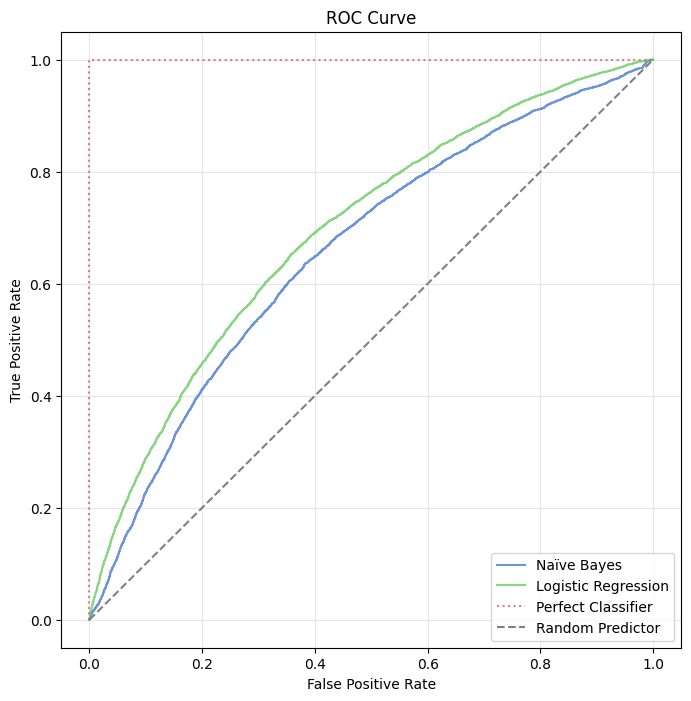

In [18]:
# Plot the ROC curve for the Naïve Bayes classifier and the Logistic regression
fig, ax = plt.subplots(figsize=(8, 8))

# Extract and plot the false positive rate, true positive rate and thresholds
# for the Naïve Bayes classifier and the Logistic regression
fpr, tpr, thresholds = roc_curve(y_test, p_nbc_test)
ax.plot(fpr, tpr, label="Naïve Bayes", alpha=0.8)

fpr, tpr, thresholds = roc_curve(y_test, p_lrc_test)
ax.plot(fpr, tpr, label="Logistic Regression", alpha=0.8)
ax.plot([0, 0, 1], [0, 1, 1], label="Perfect Classifier", linestyle=":", alpha=0.8)

ax.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Predictor")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
ax.legend()
ax.grid(alpha=.3)


In [19]:
# Compute the AUC score for the Naïve Bayes classifier and the Logistic regression
print("Area Under the ROC Curve (AUC)")
print("-" * 30)
print(f"Naïve Bayes        : {roc_auc_score(y_test, p_nbc_test):.3f}")
print(f"Logistic regression: {roc_auc_score(y_test, p_lrc_test):.3f}")


Area Under the ROC Curve (AUC)
------------------------------
Naïve Bayes        : 0.659
Logistic regression: 0.695


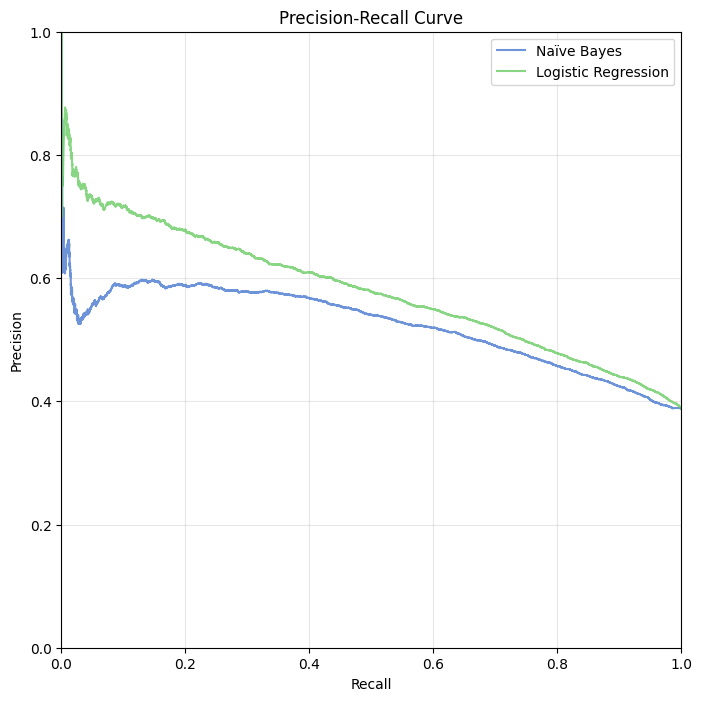

In [20]:
from sklearn.metrics import precision_recall_curve

# Plot the precision-recall curve for the Naïve Bayes classifier and the Logistic regression
fig, ax = plt.subplots(figsize=(8, 8))

# Extract and plot the precision, recall and thresholds
# for the Naïve Bayes classifier and the Logistic regression
precision, recall, thresholds = precision_recall_curve(y_test, p_nbc_test)
ax.plot(recall, precision, label="Naïve Bayes", alpha=0.8)

precision, recall, thresholds = precision_recall_curve(y_test, p_lrc_test)
ax.plot(recall, precision, label="Logistic Regression", alpha=0.8)

ax.set(xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
       xlim=(0, 1), ylim=(0, 1))
ax.set_title("Precision-Recall Curve")
ax.legend()
ax.grid(alpha=.3)

___


### Confusion Matrix

The confusion matrix is a tool that summarizes the performance of a classification algorithm using the $TP$, $TN$, $FP$, and $FN$ values. It provides a detailed breakdown of predictions into each of these four categories. The confusion matrix is typically used to measure the performance of a binary classifier, but it can also be used for multi-class problems. It contains all the information about the performance of a classifier, but it is more difficult to interpret than some of the other metrics.

Text(0.5, 1.0, 'Logistic Regression')

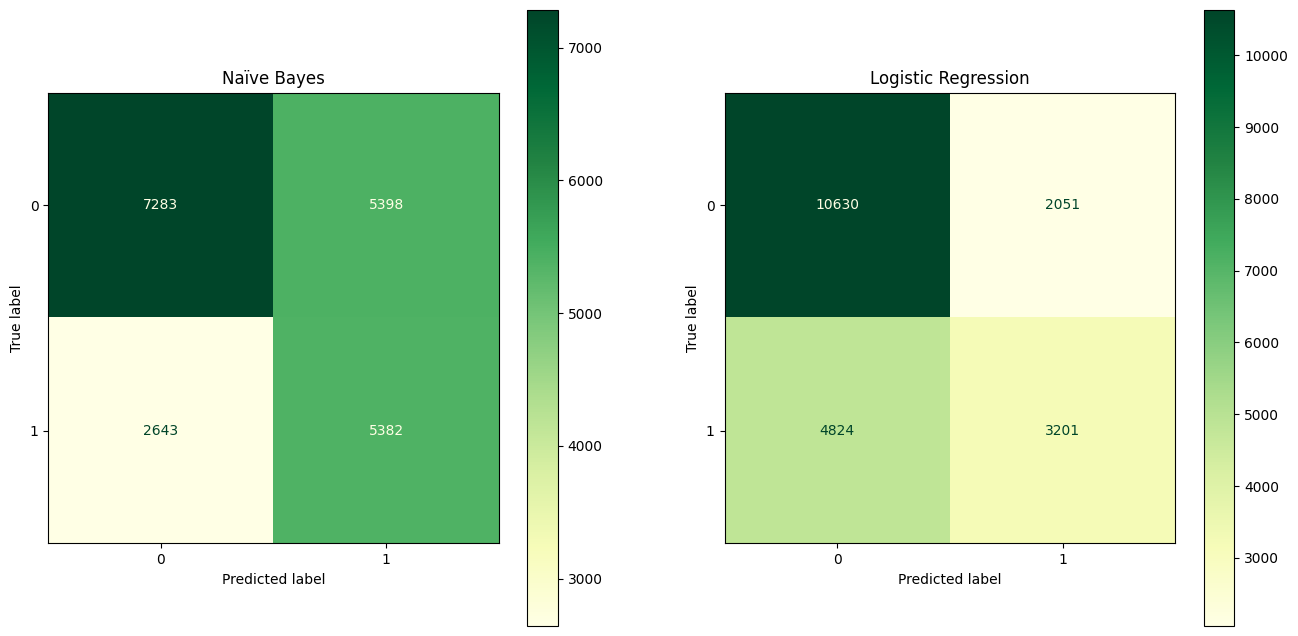

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix for the Naïve Bayes classifier and the Logistic regression
cm_nbc = confusion_matrix(y_test, y_hat_nbc_test)
cm_lrc = confusion_matrix(y_test, y_hat_lrc_test)

# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ConfusionMatrixDisplay.from_estimator(nbc, X_test, y_test, ax=ax[0], cmap=plt.cm.YlGn)
ax[0].set_title("Naïve Bayes")
ConfusionMatrixDisplay.from_estimator(lrc, X_test, y_test, ax=ax[1], cmap=plt.cm.YlGn)
ax[1].set_title("Logistic Regression")

#### ➡️ ✏️ Task 3
Fit two new models on `X_train`:
+ A `GaussianNB` model which uses a [`SplineTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html) first to create features.
+ A `LogisticRegression` model which also uses a `SplineTransformer` first.

For both models, compare the accuracy, precision, and recall on the test set. Also, plot the ROC curve and compute the AUC for both models.

Which models would you use for the task at hand? Discuss with your classmates.

In [22]:
from sklearn.preprocessing import SplineTransformer

In [23]:
def eval_model(model, X_test, y_test, name, ax):
    # Compute predictions
    y_hat = model.predict(X_test)
    p_hat = model.predict_proba(X_test)[:, 1]

    # Make dictionary with metrics
    results = {
        "accuracy": accuracy_score(y_test, y_hat),
        "precision": precision_score(y_test, y_hat),
        "recall": recall_score(y_test, y_hat),
        "f1": f1_score(y_test, y_hat)
    }
    # Compute ROC curve
    if ax is not None:
        fpr, tpr, thresholds = roc_curve(y_test, p_hat)
        ax.plot(fpr, tpr, label=name, alpha=0.8)

    return results

In [24]:
lrc2 = Pipeline([
    ("scaler", PowerTransformer(method="yeo-johnson")),
    ("spline", SplineTransformer()), 
    ("model", LogisticRegression(max_iter=1000))
])
nbc2 = Pipeline([
    ("scaler", PowerTransformer(method="yeo-johnson")),
    ("spline", SplineTransformer()), 
    ("model", GaussianNB())
])

In [25]:
lrc2.fit(X_train, y_train)
nbc2.fit(X_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()), ('spline', SplineTransformer()),
                ('model', GaussianNB())])

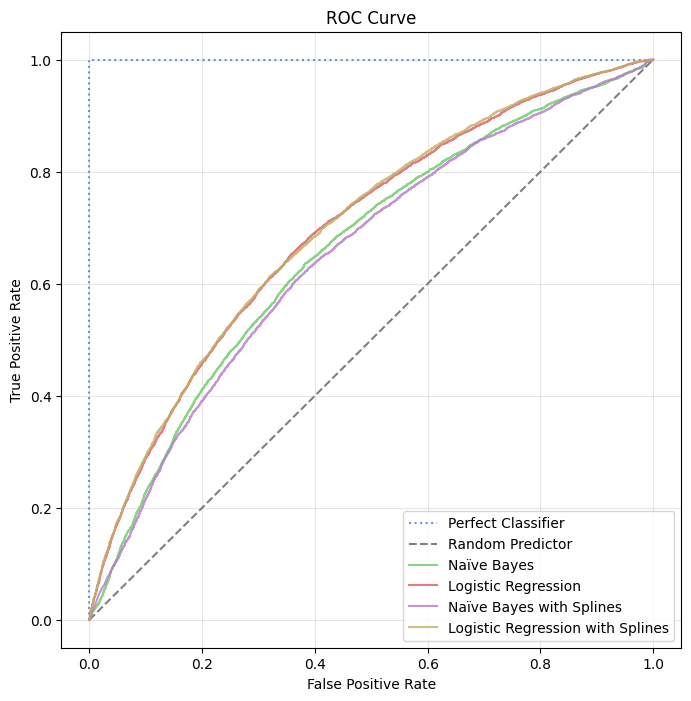

In [26]:
# Plot the ROC curve for the Naïve Bayes classifier and the Logistic regression
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot([0, 0, 1], [0, 1, 1], label="Perfect Classifier", linestyle=":", alpha=0.8)
ax.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Predictor")
ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
       title="ROC Curve")
ax.grid(alpha=.3)

# Evaluate the models
res_nbc = eval_model(nbc, X_test, y_test, "Naïve Bayes", ax)
res_lrc = eval_model(lrc, X_test, y_test, "Logistic Regression", ax)
res_nbc2 = eval_model(nbc2, X_test, y_test, "Naïve Bayes with Splines", ax)
res_lrc2 = eval_model(lrc2, X_test, y_test, "Logistic Regression with Splines", ax)

ax.legend();

In [27]:
# Make dataframe for prettier printing
res = pd.DataFrame([res_nbc, res_lrc, res_nbc2, res_lrc2])
res.index = ["Naïve Bayes", "Logistic Regression", "Naïve Bayes with Splines", "Logistic Regression with Splines"]
res

,accuracy,precision,recall,f1
Naïve Bayes,0.611658,0.499258,0.670654,0.572401
Logistic Regression,0.667971,0.609482,0.398879,0.482187
Naïve Bayes with Splines,0.505602,0.431559,0.869034,0.576721
Logistic Regression with Splines,0.667826,0.608762,0.400000,0.482779
